# Partie B – Régression : California Housing
Ce notebook applique la régression linéaire sur le dataset `California Housing` pour prédire la valeur médiane des maisons en fonction de plusieurs caractéristiques démographiques et géographiques.

In [25]:
# 1. Monter Google Drive (optionnel si fichier local dans sklearn)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# 2. Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set(style="darkgrid")
%matplotlib inline

In [27]:
# 3. Charger le dataset California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Analyse exploratoire des données

In [28]:
# 4. Statistiques et valeurs manquantes
print(df.describe())
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())
df = df.dropna()

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [29]:
# 5. Séparation des features et de la cible
target_col = 'MedHouseVal'
X = df.drop(target_col, axis=1)
y = df[target_col]

In [30]:
# 6. Séparation en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 7. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Régression linéaire

In [32]:
# 8. Entraînement du modèle
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
# 9. Prédictions
y_pred = model.predict(X_test_scaled)

### Évaluation du modèle

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² score: {r2:.4f}")

Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
R² score: 0.5758


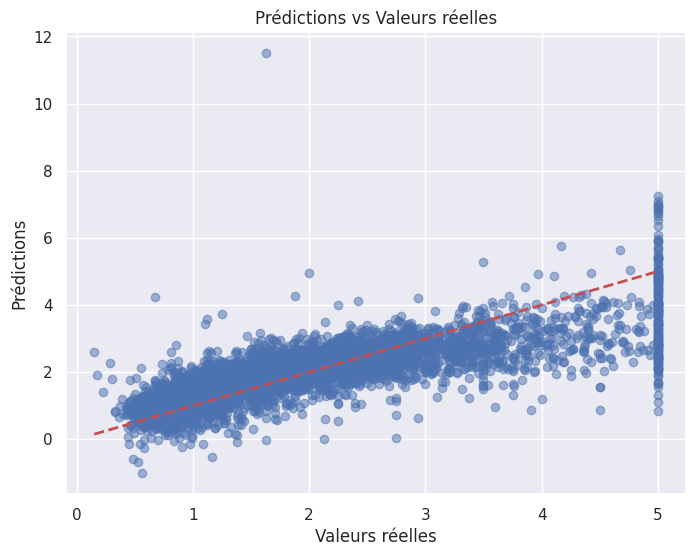

In [35]:
# 10. Visualisation : Prédictions vs Valeurs réelles
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.show()

### Importance des variables

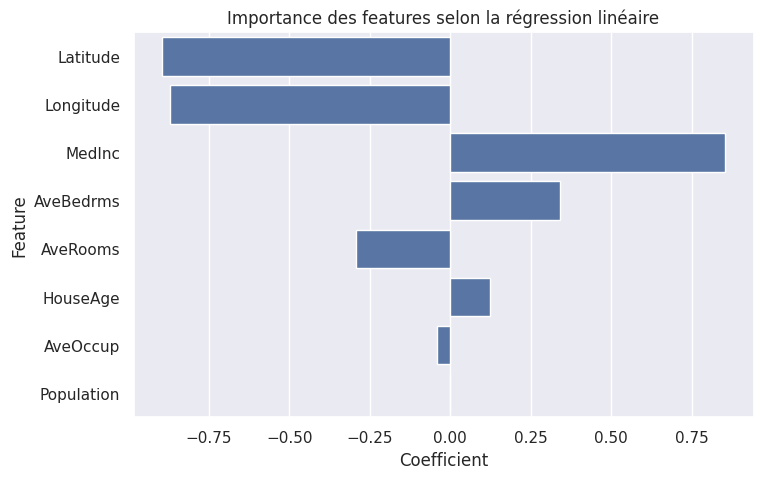

In [36]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Importance des features selon la régression linéaire")
plt.show()